In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 5 - Simulation with a compute function

In previous tutorials, we covered the simulation of a single qubit, where we received a list of states from the `runSimulation` method, and used those states to compute some expectation values.
In this tutorial, we will show an alternative that computes whatever we want during the evolution.
The advantage in this approach is that we don't have to keep a list of state vectors, which in general takes a lot memory.
We, instead, only store some scaler quantities we are interested in.

Again, here, we will evolve a qubit under the unitary dynamics of its Hamiltonian $H=\frac{1}{2}f_{z}\sigma_{z} = f_{z}J_{z}$ with the initial state set to the equal superposition of $|1\rangle$ and $|0\rangle$.
We also set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`).

In [2]:
# create the qubit and set its initial state and frequency
qub = qg.Qubit(frequency = 1)
qub.initialState = [0, 1]

# set the simulation time and step size
qub.simTotalTime = 2*np.pi
qub.simStepSize = 0.1

Now, we introduce the `compute` function and focus on its usage through `QuantumSystem` objects.
We will cover more general usages of `compute` function/s in later tutorials, but the example here should suffice for most purposes.

We write `compute` function/s as generic functions, and store them in the `compute` attribute of `QuantumSystem` objects.
During the time evolution of the system, the library calls the `compute` function/s at each time step of the evolution.
When it is called in the background, the library passes the `QuantumSystem` object as the first argument of the `compute` function, and the state of the `QuantumSystem` at the current step of the evolution as the second argument.

Here, we will set a `compute` function to our `Qubit`, so the library will pass the qubit as the first argument, and its state at each time step as the second argument.
Then, inside this function, we can compute anything we want from the state, and, below, we compute the expectation values of $\sigma_{x}$ and $\sigma_{z}$ operators.
We still need to store these expectation values in somewhere, and this is where we use the `.results` attribute.
We just call `.results['someKey'].append(someValue)` to store `someValue` with `someKey`, and the library takes care of the rest.


In [3]:
# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()
sigmaZ = qg.sigmaz()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .results
def compute(qsys, state):
    qsys.results['sigmax expectation'].append(qg.expectation(sigmaX, state))
    qsys.results['sigmaz expectation'].append(qg.expectation(sigmaZ, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`, which returns the list of states for the time evolution of our `QuantumSystem`.

But, in this case, we don't want/need to store the states, because the `compute` function can and will compute all the quantities we are interested in.
Therefore, we simply set `simDelState` to `True`, which will flag that we do not want to store the states.

In [4]:
qub.simDelStates = True
states = qub.runSimulation()

Now, we receive the `results` that we stored as `qub.results['sigmax expectation']`

As expected, the expectation value of $\sigma_{x}$ oscillates, while the expectation value of $\sigma_{z}$ is constant (since $\left[ H, \sigma_{z} \right] = 0$)

Text(0.5, 0, 'Time')

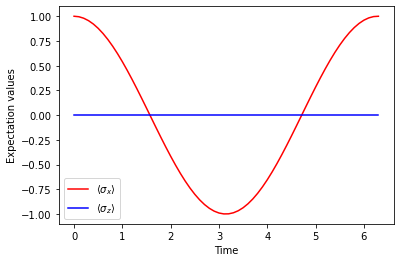

In [5]:
plt.plot(qub.simulation.timeList, qub.results['sigmax expectation'], 'r-', label=r"$\langle \sigma_{x} \rangle$")
plt.plot(qub.simulation.timeList, qub.results['sigmaz expectation'], 'b-', label=r"$\langle \sigma_{z} \rangle$")

plt.legend()
plt.ylabel("Expectation values")
plt.xlabel("Time")